# Polynomial Regression with K-Fold Cross-Validation

This notebook demonstrates polynomial regression on a dataset using K-Fold cross-validation. 
We will evaluate models of different polynomial degrees, compute their mean squared error (MSE), and visualize the results to select the best-fitting polynomial.


# Polynomial Regression Workflow

1. **Import Libraries**  
   Import the necessary Python libraries for data handling (`pandas`, `numpy`), polynomial feature generation (`sklearn.preprocessing.PolynomialFeatures`), linear regression (`sklearn.linear_model.LinearRegression`), cross-validation (`sklearn.model_selection.KFold`), and visualization (`matplotlib.pyplot`).

2. **Load Data**  
   Read the dataset from a CSV file using `pandas` and inspect its structure.

3. **Prepare Features and Target**  
   Separate the input features (X) and the target variable (y).

4. **Define K-Fold Cross-Validation Function**  
   Create a function that performs K-Fold cross-validation for polynomial regression of degrees 1 to a specified maximum. The function returns the mean squared error (MSE) for each degree.

5. **Perform K-Fold Cross-Validation**  
   Apply the K-Fold cross-validation function to the dataset to evaluate the performance of different polynomial degrees.

6. **Visualize Results**  
   Plot the original data and polynomial regression curves for each degree. Highlight the curve with the lowest mean squared error for easy identification of the best-fitting polynomial.

7. **Interpret the Model**  
   Analyze the plots and MSE values to select the polynomial degree that best balances fit and complexity.


## 1. Import Libraries
 Import the necessary Python libraries for data handling (`pandas`, `numpy`), polynomial feature generation (`sklearn.preprocessing.PolynomialFeatures`), linear regression (`sklearn.linear_model.LinearRegression`), cross-validation (`sklearn.model_selection.KFold`), and visualization (`matplotlib.pyplot`).

In [ ]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

## 2. Load Data
Load the dataset from a CSV file. Ensure that the CSV is in the same folder as this notebook or provide the relative path.

In [ ]:
# Load dataset
DATA_PATH = 'Beispiel 3.csv'  # Update path if needed
df = pd.read_csv(DATA_PATH)
df.head()

## 3. Prepare Features and Target
Separate the input features (`X`) from the target variable (`y`). 
We assume the last column is the target variable.


In [ ]:
X = df.drop(columns=df.columns[-1])
y = df[df.columns[-1]]

## 4. Define K-Fold Cross-Validation Function
This function evaluates polynomial regression models of degrees 1 to `max_degree` using K-Fold cross-validation. 
It returns the mean squared error (MSE) for each degree.

In [ ]:
def k_cross_validation(X, y, max_degree=4, k=5, random_state=42):
    """
    Perform K-Fold cross-validation for polynomial regression.

    Parameters:
        X : array-like, feature matrix
        y : array-like, target vector
        max_degree : int, maximum degree of polynomial
        k : int, number of folds
        random_state : int, random seed

    Returns:
        results : dict, {degree: mean MSE}
    """
    X = np.array(X)
    y = np.array(y).flatten()  # ensure y is 1-dimensional

    if X.ndim == 1:
        X = X.reshape(-1, 1)  # ensure X is 2-dimensional

    kf = KFold(n_splits=k, shuffle=True, random_state=random_state)
    results = {}

    for degree in range(1, max_degree + 1):
        mse_list = []
        poly = PolynomialFeatures(degree=degree, include_bias=True)

        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            X_train_poly = poly.fit_transform(X_train)
            X_test_poly = poly.transform(X_test)

            model = LinearRegression().fit(X_train_poly, y_train)
            y_pred = model.predict(X_test_poly)
            mse_list.append(np.mean((y_pred - y_test) ** 2))

        results[degree] = np.mean(mse_list)

    return results


## 5. Perform K-Fold Cross-Validation
Evaluate polynomial regression models of degrees 1 to 4 and print the mean squared error for each degree.


In [ ]:
results = k_cross_validation(X, y, max_degree=4, k=5)
results

## 6. Visualize Results
Plot the original data and polynomial regression curves for each degree. 
The curve with the lowest MSE is highlighted in red.


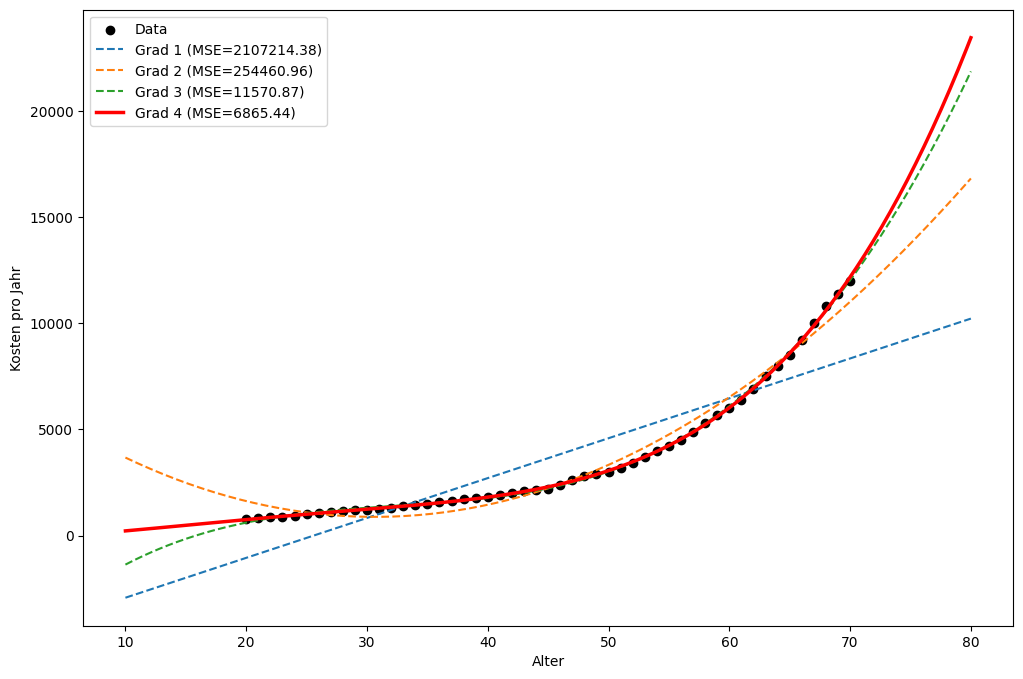

In [ ]:
# Prepare plot
X_plot = np.linspace(X.min() - 10, X.max() + 10, 200).reshape(-1, 1)
best_mse = min(results.values())

plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='black', label='Data')

for degree in range(1, 5):
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly = poly.fit_transform(X.values.reshape(-1, 1))
    model = LinearRegression().fit(X_poly, y)
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    if results[degree] == best_mse:
        plt.plot(X_plot, y_plot, color='red', linewidth=2.5, 
                 label=f"Degree {degree} (Best, MSE={best_mse:.2f})")
    else:
        plt.plot(X_plot, y_plot, linestyle='--', 
                 label=f"Degree {degree} (MSE={results[degree]:.2f})")

plt.xlabel('Age')
plt.ylabel('Annual Cost')
plt.title('Polynomial Regression with K-Fold Cross-Validation')
plt.legend()
plt.grid(True)
plt.show()


## 7. Interpretation
- The red curve represents the polynomial degree with the **lowest mean squared error (best fit)**.  
- Compare other dashed curves to see underfitting (too simple) or overfitting (too complex) behavior.  
- The MSE values help select the degree that balances fit and complexity.
